In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd
import nelpy as nel
from scipy.signal import find_peaks
from reactivation import AssemblyReact, load_cell_metrics, load_epochs, load_ripples_events, load_SleepState_states, load_spikes, event_triggered_average_fast

## A015_day12

In [3]:
project_path='D:/Research Topic/tristan/step10_olivadata'

mice_name_A015_day12 = 'A015_day12'

assembly_react_A015_day12 = AssemblyReact(
    project_path=project_path,
    mice_name= mice_name_A015_day12,
    brainRegion="CA2-CA3",
    putativeCellType="pyr",
    z_mat_dt=0.025,
    )

In [4]:
assembly_react_A015_day12.load_data()
assembly_react_A015_day12.epoch_df
assembly_react_A015_day12.st
state_dict_A015_day12 = load_SleepState_states(project_path, mice_name_A015_day12)

wake_epoch = nel.EpochArray(
    state_dict_A015_day12["WAKEepisode"],
)

nrem_epochs = nel.EpochArray(
    state_dict_A015_day12["NREMepisode"],
)


C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support


In [5]:
assembly_react_A015_day12.epoch_df

,Cage_or_Maze,Start_Time,End_Time
0,rest_hab_pre,0.000000,2418.300000
1,habituation_arena,2418.300000,2649.483333
2,rest_hab_post,2649.483333,7713.083333
3,habituation_cage,7713.083333,7968.700000
4,rest_pre,7968.700000,10526.900000
5,2novel_exposure,10526.900000,10816.550000
6,exposure_reversed,10816.550000,11100.150000
7,rest_post2,11100.150000,14932.150000
8,1novel_exposure,14932.150000,15173.383333


In [6]:
len(assembly_react_A015_day12.cell_metrics)

20

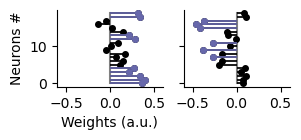

In [7]:
assembly_react_A015_day12.get_weights(epoch= assembly_react_A015_day12.epochs[3] & wake_epoch)
assembly_react_A015_day12.plot()
plt.show()

In [8]:
assembly_act_pre_A015_day12 = assembly_react_A015_day12.get_assembly_act(assembly_react_A015_day12.epochs[2] & nrem_epochs)
assembly_act_post_A015_day12 = assembly_react_A015_day12.get_assembly_act(assembly_react_A015_day12.epochs[4] & nrem_epochs) 

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.


In [9]:
act_pre_sleep_above_A015_day12 = np.where(assembly_act_pre_A015_day12.data[:] > 5, assembly_act_pre_A015_day12.data[:], 0)
act_post_sleep_above_A015_day12 = np.where(assembly_act_post_A015_day12.data[:] > 5, assembly_act_post_A015_day12.data[:], 0)

In [10]:

sampling_rate = 1  # Replace with actual rate

# Define the duration of each bin in seconds
bin_duration = 60


def compute_peak_averages(data):
    bin_size = bin_duration * sampling_rate
    bins = np.array_split(data, len(data) // bin_size)
    bin_means = [np.mean(bin_data) for bin_data in bins]
    return np.array(bin_means)

reactivation_rates_A015_day12 = []

for pre_sleep_data, post_sleep_data in zip(act_pre_sleep_above_A015_day12, act_post_sleep_above_A015_day12):
    # Compute peak averages for the current pair of sessions
    pre_sleep_peak_averages = compute_peak_averages(pre_sleep_data)
    post_sleep_peak_averages = compute_peak_averages(post_sleep_data)
    
    # Average reactivation strengths
    avg_pre_sleep_reactivation = np.mean(pre_sleep_peak_averages)
    avg_post_sleep_reactivation = np.mean(post_sleep_peak_averages)
    
    # Overall average peak reactivation strength for normalization
    all_peak_averages = np.concatenate((pre_sleep_peak_averages, post_sleep_peak_averages))
    overall_average_reactivation = np.mean(all_peak_averages)
    
    # Calculate the reactivation strength difference and normalize
    reactivation_strength_difference = (avg_post_sleep_reactivation - avg_pre_sleep_reactivation)
    
    # Avoid division by zero if there are no peaks detected in both sessions
    if overall_average_reactivation != 0:
        normalized_reactivation_strength_difference = reactivation_strength_difference / overall_average_reactivation
    else:
        normalized_reactivation_strength_difference = 0
    
    reactivation_rates_A015_day12.append(normalized_reactivation_strength_difference)

# The reactivation_rates list now contains the reactivation rate for each pair of pre-sleep and post-sleep arrays
print("Reactivation Rates:", reactivation_rates_A015_day12)

Reactivation Rates: [-0.006822767778946568, 0.04815283078598567]


In [11]:
Peak_reactivation_Joint_A015_day12 = reactivation_rates_A015_day12

## A013_day7

In [13]:
project_path='D:/Research Topic/tristan/step10_olivadata'

mice_name = 'A013_day7'

assembly_react_A013_day7 = AssemblyReact(
    project_path=project_path,
    mice_name= mice_name,
    brainRegion="CA2-CA3",
    putativeCellType="pyr",
    z_mat_dt=0.025,
    )

In [14]:
assembly_react_A013_day7.load_data()
assembly_react_A013_day7.epoch_df
assembly_react_A013_day7.st
assembly_react_A013_day7.cell_metrics
state_dict_A013_day7 = load_SleepState_states(project_path, mice_name)

wake_epoch = nel.EpochArray(
    state_dict_A013_day7["WAKEepisode"],
)

nrem_epochs = nel.EpochArray(
    state_dict_A013_day7["NREMepisode"],
)

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support


In [15]:
assembly_react_A013_day7.epoch_df

,Cage_or_Maze,Start_Time,End_Time
0,rest_hab_pre,0.000000,2367.133333
1,habituation_arena,2367.133333,2704.833333
2,rest_hab_post,2704.833333,4525.050000
3,habituation_cage,4525.050000,4803.033333
4,rest_pre,4803.033333,5598.166667
5,2novel_exposure,5598.166667,5954.583333
6,exposure_reversed,5954.583333,6203.716667
7,rest_post2,6203.716667,10313.616667
8,1novel_exposure,10313.616667,10692.500000
9,rest_post1,10692.500000,11848.083333


In [16]:
#assembly_react_A013_day7.cell_metrics

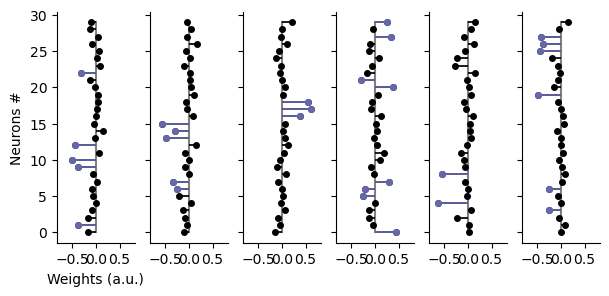

In [17]:
assembly_react_A013_day7.get_weights(epoch= assembly_react_A013_day7.epochs[3] & wake_epoch)
assembly_react_A013_day7.plot()
plt.show()

In [18]:
assembly_act_pre_A013_day7 = assembly_react_A013_day7.get_assembly_act(assembly_react_A013_day7.epochs[2] & nrem_epochs)
assembly_act_post_A013_day7 = assembly_react_A013_day7.get_assembly_act(assembly_react_A013_day7.epochs[4] & nrem_epochs)
act_pre_sleep_above_A013_day7 = np.where(assembly_act_pre_A013_day7.data[:] > 5, assembly_act_pre_A013_day7.data[:], 0)
act_post_sleep_above_A013_day7 = np.where(assembly_act_post_A013_day7.data[:] > 5, assembly_act_post_A013_day7.data[:], 0)

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.


In [19]:
reactivation_rates_A013_day7 = []

for pre_sleep_data, post_sleep_data in zip(act_pre_sleep_above_A013_day7, act_post_sleep_above_A013_day7):
    # Compute peak averages for the current pair of sessions
    pre_sleep_peak_averages = compute_peak_averages(pre_sleep_data)
    post_sleep_peak_averages = compute_peak_averages(post_sleep_data)
    
    # Average reactivation strengths
    avg_pre_sleep_reactivation = np.mean(pre_sleep_peak_averages)
    avg_post_sleep_reactivation = np.mean(post_sleep_peak_averages)
    
    # Overall average peak reactivation strength for normalization
    all_peak_averages = np.concatenate((pre_sleep_peak_averages, post_sleep_peak_averages))
    overall_average_reactivation = np.mean(all_peak_averages)
    
    # Calculate the reactivation strength difference and normalize
    reactivation_strength_difference = (avg_post_sleep_reactivation - avg_pre_sleep_reactivation)
    
    # Avoid division by zero if there are no peaks detected in both sessions
    if overall_average_reactivation != 0:
        normalized_reactivation_strength_difference = reactivation_strength_difference / overall_average_reactivation
    else:
        normalized_reactivation_strength_difference = 0
    
    reactivation_rates_A013_day7.append(normalized_reactivation_strength_difference)

# The reactivation_rates list now contains the reactivation rate for each pair of pre-sleep and post-sleep arrays
print("Reactivation Rates:", reactivation_rates_A013_day7)

Reactivation Rates: [0.028498849799659443, -0.07800166323865522, -0.2776848454344939, 0.11830995742784993, -0.07707296254354218, 0.03442492133105129]


In [20]:
num_ass = 6
Peak_reactivation_CA2_A013_day7 = []  
Peak_reactivation_JointCA2_3_A013_day7 = []

for i in range(num_ass):
    reactivation_value = reactivation_rates_A013_day7[i]
    if i in {1,2,4}:
        Peak_reactivation_CA2_A013_day7.append(reactivation_value)
    else:
        Peak_reactivation_JointCA2_3_A013_day7.append(reactivation_value)


Peak_reactivation_JointCA2_3_A013_day7, Peak_reactivation_CA2_A013_day7

([0.028498849799659443, 0.11830995742784993, 0.03442492133105129],
 [-0.07800166323865522, -0.2776848454344939, -0.07707296254354218])

## A013_day15

In [22]:
project_path='D:/Research Topic/tristan/step10_olivadata'

mice_name = 'A013_day15'

assembly_react_A013_day15 = AssemblyReact(
    project_path=project_path,
    mice_name= mice_name,
    brainRegion="CA2",
    putativeCellType="pyr",
    z_mat_dt=0.025,
    )

In [23]:
assembly_react_A013_day15.load_data()
assembly_react_A013_day15.st
state_dict_A013_day15 = load_SleepState_states(project_path, mice_name)

wake_epoch = nel.EpochArray(
    state_dict_A013_day15["WAKEepisode"],
)

nrem_epochs = nel.EpochArray(
    state_dict_A013_day15["NREMepisode"],
)

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support


In [24]:
assembly_react_A013_day15.epoch_df

,Cage_or_Maze,Start_Time,End_Time
0,rest_hab_pre,0.000000,1858.566667
1,habituation_arena,1858.566667,2070.283333
2,rest_hab_post,2070.283333,3609.150000
3,habituation_cage,3609.150000,3907.066667
4,rest_pre,3907.066667,6102.083333
5,2novel_exposure,6102.083333,6344.233333
6,exposure_reversed,6344.233333,6572.450000
7,rest_post2,6572.450000,10804.400000
8,1novel_exposure,10804.400000,11057.933333
9,rest_post1,11057.933333,17857.533333


In [25]:
assembly_react_A013_day15.cell_metrics

,Type,Region,Modulation,CluID
0,pyr,CA2,positive,0
1,pyr,CA2,positive,1
2,pyr,CA2,positive,2
3,pyr,CA2,negative,3
4,pyr,CA2,positive,4
7,pyr,CA2,positive,7
8,pyr,CA2,positive,8
9,pyr,CA2,positive,9
10,pyr,CA2,positive,10
11,pyr,CA2,positive,11


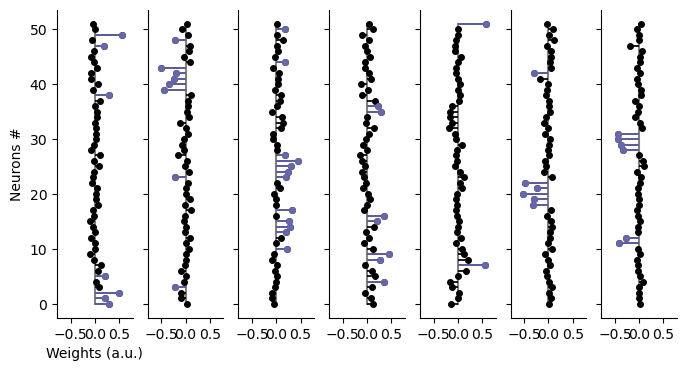

In [26]:
assembly_react_A013_day15.get_weights(epoch= assembly_react_A013_day15.epochs[3] & wake_epoch)
assembly_react_A013_day15.plot()
plt.show()

In [27]:
assembly_act_pre_A013_day15 = assembly_react_A013_day15.get_assembly_act(assembly_react_A013_day15.epochs[2] & nrem_epochs) 
assembly_act_post_A013_day15 = assembly_react_A013_day15.get_assembly_act(assembly_react_A013_day15.epochs[4] & nrem_epochs) 
act_pre_sleep_above_A013_day15 = np.where(assembly_act_pre_A013_day15.data[:] > 5, assembly_act_pre_A013_day15.data[:], 0)
act_post_sleep_above_A013_day15 = np.where(assembly_act_post_A013_day15.data[:] > 5, assembly_act_post_A013_day15.data[:], 0)

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.


In [28]:
reactivation_rates_A013_day15 = []

for pre_sleep_data, post_sleep_data in zip(act_pre_sleep_above_A013_day15, act_post_sleep_above_A013_day15):
    # Compute peak averages for the current pair of sessions
    pre_sleep_peak_averages = compute_peak_averages(pre_sleep_data)
    post_sleep_peak_averages = compute_peak_averages(post_sleep_data)
    
    # Average reactivation strengths
    avg_pre_sleep_reactivation = np.mean(pre_sleep_peak_averages)
    avg_post_sleep_reactivation = np.mean(post_sleep_peak_averages)
    
    # Overall average peak reactivation strength for normalization
    all_peak_averages = np.concatenate((pre_sleep_peak_averages, post_sleep_peak_averages))
    overall_average_reactivation = np.mean(all_peak_averages)
    
    # Calculate the reactivation strength difference and normalize
    reactivation_strength_difference = (avg_post_sleep_reactivation - avg_pre_sleep_reactivation)
    
    # Avoid division by zero if there are no peaks detected in both sessions
    if overall_average_reactivation != 0:
        normalized_reactivation_strength_difference = reactivation_strength_difference / overall_average_reactivation
    else:
        normalized_reactivation_strength_difference = 0
    
    reactivation_rates_A013_day15.append(normalized_reactivation_strength_difference)

# The reactivation_rates list now contains the reactivation rate for each pair of pre-sleep and post-sleep arrays
print("Reactivation Rates:", reactivation_rates_A013_day15)

Reactivation Rates: [0.06845432406887379, -0.04790471762290326, -0.36800096481219113, -0.22305048202388755, -0.2727255495012369, -0.6223487720986786, -0.32536427759000436]


In [29]:

Peak_reactivation_CA2_A013_day15 = reactivation_rates_A013_day15

## A013_day13

In [31]:
project_path='D:/Research Topic/tristan/step10_olivadata'

mice_name = 'A013_day13'

assembly_react_A013_day13 = AssemblyReact(
    project_path=project_path,
    mice_name= mice_name,
    brainRegion="CA2",
    putativeCellType="pyr",
    z_mat_dt=0.025,
    )

In [32]:
assembly_react_A013_day13.load_data()
assembly_react_A013_day13.st
state_dict_A013_day13 = load_SleepState_states(project_path, mice_name)

wake_epoch = nel.EpochArray(
    state_dict_A013_day13["WAKEepisode"],
)

nrem_epochs = nel.EpochArray(
    state_dict_A013_day13["NREMepisode"],
)

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support


In [33]:
assembly_react_A013_day13.epoch_df

,Cage_or_Maze,Start_Time,End_Time
0,rest_hab_pre,0.000000,2333.183333
1,habituation_arena,2333.183333,2560.416667
2,rest_hab_post,2560.416667,4405.633333
3,habituation_cage,4405.633333,4557.216667
4,rest_pre,4557.216667,8314.366667
5,2novel_exposure,8314.366667,8569.333333
6,exposure_reversed,8569.333333,8820.266667
7,rest_post2,8820.266667,11501.800000
8,1novel_exposure,11501.800000,11827.583333


In [34]:
assembly_react_A013_day13.cell_metrics

,Type,Region,Modulation,CluID
0,pyr,CA2,negative,0
1,pyr,CA2,positive,1
2,pyr,CA2,positive,2
3,pyr,CA2,positive,3
4,pyr,CA2,positive,4
5,pyr,CA2,positive,5
6,pyr,CA2,positive,6
7,pyr,CA2,positive,7
8,pyr,CA2,positive,8
9,pyr,CA2,positive,9


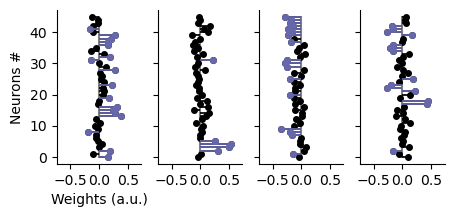

In [35]:
assembly_react_A013_day13.get_weights(epoch= assembly_react_A013_day13.epochs[3] & wake_epoch)
assembly_react_A013_day13.plot()
plt.show()

In [36]:
assembly_act_pre_A013_day13 = assembly_react_A013_day13.get_assembly_act(assembly_react_A013_day13.epochs[2] & nrem_epochs) 
assembly_act_post_A013_day13 = assembly_react_A013_day13.get_assembly_act(assembly_react_A013_day13.epochs[4] & nrem_epochs) 
act_pre_sleep_above_A013_day13 = np.where(assembly_act_pre_A013_day13.data[:] > 5, assembly_act_pre_A013_day13.data[:], 0)
act_post_sleep_above_A013_day13 = np.where(assembly_act_post_A013_day13.data[:] > 5, assembly_act_post_A013_day13.data[:], 0)

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.


In [37]:
reactivation_rates_A013_day13 = []

for pre_sleep_data, post_sleep_data in zip(act_pre_sleep_above_A013_day13, act_post_sleep_above_A013_day13):
    # Compute peak averages for the current pair of sessions
    pre_sleep_peak_averages = compute_peak_averages(pre_sleep_data)
    post_sleep_peak_averages = compute_peak_averages(post_sleep_data)
    
    # Average reactivation strengths
    avg_pre_sleep_reactivation = np.mean(pre_sleep_peak_averages)
    avg_post_sleep_reactivation = np.mean(post_sleep_peak_averages)
    
    # Overall average peak reactivation strength for normalization
    all_peak_averages = np.concatenate((pre_sleep_peak_averages, post_sleep_peak_averages))
    overall_average_reactivation = np.mean(all_peak_averages)
    
    # Calculate the reactivation strength difference and normalize
    reactivation_strength_difference = (avg_post_sleep_reactivation - avg_pre_sleep_reactivation)
    
    # Avoid division by zero if there are no peaks detected in both sessions
    if overall_average_reactivation != 0:
        normalized_reactivation_strength_difference = reactivation_strength_difference / overall_average_reactivation
    else:
        normalized_reactivation_strength_difference = 0
    
    reactivation_rates_A013_day13.append(normalized_reactivation_strength_difference)

# The reactivation_rates list now contains the reactivation rate for each pair of pre-sleep and post-sleep arrays
print("Reactivation Rates:", reactivation_rates_A013_day13)

Reactivation Rates: [0.030720737909533027, 0.08136907027807583, 0.5315196988438284, -0.10798787989014785]


In [38]:
Peak_reactivation_CA2_A013_day13 = reactivation_rates_A013_day13

## A012_day15

In [40]:
project_path='D:/Research Topic/tristan/step10_olivadata'

mice_name = 'A012_day15'

assembly_react_A012_day15 = AssemblyReact(
    project_path=project_path,
    mice_name= mice_name,
    brainRegion="CA2-CA1",
    putativeCellType="pyr",
    z_mat_dt=0.025,
    )

In [41]:
assembly_react_A012_day15.load_data()
assembly_react_A012_day15.st
assembly_react_A012_day15.epoch_df

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support


,Cage_or_Maze,Start_Time,End_Time
0,rest_hab_pre,0.000000,1979.283333
1,habituation_arena,1979.283333,2200.566667
2,rest_hab_post,2200.566667,4082.816667
3,habituation_cage,4082.816667,4319.833333
4,rest_pre,4319.833333,6962.466667
5,2novel_exposure,6962.466667,7207.216667
6,exposure_reversed,7207.216667,7509.900000
7,rest_post2,7509.900000,12106.666667
8,1novel_exposure,12106.666667,12384.666667
9,rest_post1,12384.666667,18832.900000


In [42]:
assembly_react_A012_day15.cell_metrics

,Type,Region,Modulation,CluID
1,pyr,CA2,negative,1
9,pyr,CA2,positive,9
10,pyr,CA2,negative,10
12,pyr,CA2,positive,12
14,pyr,CA2,positive,14
...,...,...,...,...
82,pyr,CA1,positive,82
85,pyr,CA1,positive,85
86,pyr,CA1,positive,86
87,pyr,CA1,positive,87


In [43]:
state_dict_A012_day15 = load_SleepState_states(project_path, mice_name)

wake_epoch = nel.EpochArray(
    state_dict_A012_day15["WAKEepisode"],
)

nrem_epochs = nel.EpochArray(
    state_dict_A012_day15["NREMepisode"],
)

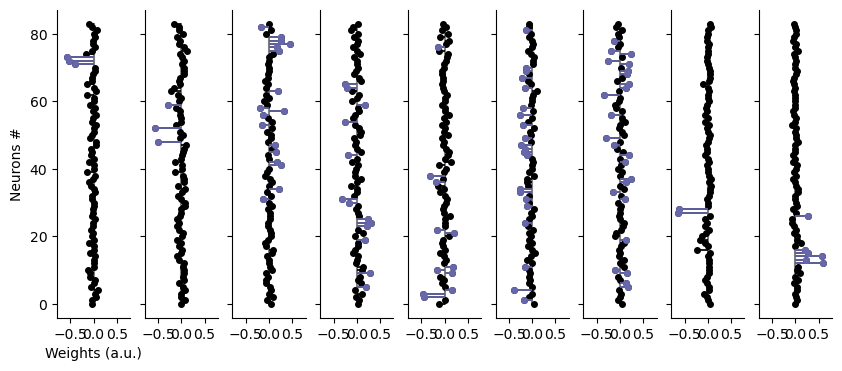

In [44]:
assembly_react_A012_day15.get_weights(epoch= assembly_react_A012_day15.epochs[3] & wake_epoch)
assembly_react_A012_day15.plot()
plt.show()

In [45]:
assembly_act_pre_A012_day15 = assembly_react_A012_day15.get_assembly_act(assembly_react_A012_day15.epochs[2] & nrem_epochs) 
assembly_act_post_A012_day15 = assembly_react_A012_day15.get_assembly_act(assembly_react_A012_day15.epochs[4] & nrem_epochs) 
act_pre_sleep_above_A012_day15 = np.where(assembly_act_pre_A012_day15.data[:] > 5, assembly_act_pre_A012_day15.data[:], 0)
act_post_sleep_above_A012_day15 = np.where(assembly_act_post_A012_day15.data[:] > 5, assembly_act_post_A012_day15.data[:], 0)

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.


In [46]:
reactivation_rates_A012_day15 = []

for pre_sleep_data, post_sleep_data in zip(act_pre_sleep_above_A012_day15, act_post_sleep_above_A012_day15):
    # Compute peak averages for the current pair of sessions
    pre_sleep_peak_averages = compute_peak_averages(pre_sleep_data)
    post_sleep_peak_averages = compute_peak_averages(post_sleep_data)
    
    # Average reactivation strengths
    avg_pre_sleep_reactivation = np.mean(pre_sleep_peak_averages)
    avg_post_sleep_reactivation = np.mean(post_sleep_peak_averages)
    
    # Overall average peak reactivation strength for normalization
    all_peak_averages = np.concatenate((pre_sleep_peak_averages, post_sleep_peak_averages))
    overall_average_reactivation = np.mean(all_peak_averages)
    
    # Calculate the reactivation strength difference and normalize
    reactivation_strength_difference = (avg_post_sleep_reactivation - avg_pre_sleep_reactivation)
    
    # Avoid division by zero if there are no peaks detected in both sessions
    if overall_average_reactivation != 0:
        normalized_reactivation_strength_difference = reactivation_strength_difference / overall_average_reactivation
    else:
        normalized_reactivation_strength_difference = 0
    
    reactivation_rates_A012_day15.append(normalized_reactivation_strength_difference)

# The reactivation_rates list now contains the reactivation rate for each pair of pre-sleep and post-sleep arrays
print("Reactivation Rates:", reactivation_rates_A012_day15)

Reactivation Rates: [-1.38753801594109, -0.18562966084608565, -0.1431027134542156, 0.05632072712121453, -0.2855711305091724, 0.0455377930292362, 0.013062448518412727, 1.2530234525019515, -1.6511627906976745]


In [47]:
num_ass = 9
Peak_reactivation_CA2_A012_day15 = []  
Peak_reactivation_CA1_A012_day15 = []
Peak_reactivation_JointCA1_CA2_A012_day15 = []

for i in range(num_ass):
    reactivation_value = reactivation_rates_A012_day15[i]
    if i in {7,8}:
        Peak_reactivation_CA2_A012_day15.append(reactivation_value)
    elif i in {0,1}:
        Peak_reactivation_CA1_A012_day15.append(reactivation_value)
    else:
        Peak_reactivation_JointCA1_CA2_A012_day15.append(reactivation_value)

Peak_reactivation_CA2_A012_day15, Peak_reactivation_CA1_A012_day15, Peak_reactivation_JointCA1_CA2_A012_day15


([1.2530234525019515, -1.6511627906976745],
 [-1.38753801594109, -0.18562966084608565],
 [-0.1431027134542156,
  0.05632072712121453,
  -0.2855711305091724,
  0.0455377930292362,
  0.013062448518412727])

## A010_day26

In [49]:
project_path='D:/Research Topic/tristan/step10_olivadata'

mice_name = 'A010_day26'

assembly_react_A010_day26 = AssemblyReact(
    project_path=project_path,
    mice_name= mice_name,
    brainRegion="CA2-CA1",
    putativeCellType="pyr",
    z_mat_dt=0.025,
    )

In [50]:
assembly_react_A010_day26.load_data()
assembly_react_A010_day26.epoch_df
assembly_react_A010_day26.st

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support


<SpikeTrainArray at 0x14f8b6be260: 26 units (10 segments)> at 30000 Hz

In [51]:
state_dict_A010_day26 = load_SleepState_states(project_path, mice_name)

wake_epoch = nel.EpochArray(
    state_dict_A010_day26["WAKEepisode"],
)

nrem_epochs = nel.EpochArray(
    state_dict_A010_day26["NREMepisode"],
)

In [52]:
assembly_react_A010_day26.epoch_df

,Cage_or_Maze,Start_Time,End_Time
0,rest_hab_pre,0.000000,3748.850000
1,habituation_arena,3748.850000,4124.516667
2,rest_hab_post,4124.516667,7859.066667
3,habituation_cage,7859.066667,8177.133333
4,rest_pre,8177.133333,12620.850000
5,2novel_exposure,12620.850000,12920.050000
6,exposure_reversed,12920.050000,13236.200000
7,rest_post2,13236.200000,15553.100000
8,1novel_exposure,15553.100000,15817.400000
9,rest_post1,15817.400000,18365.050000


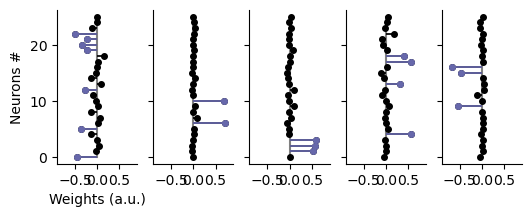

In [53]:
assembly_react_A010_day26.get_weights(epoch= assembly_react_A010_day26.epochs[3] & wake_epoch)
assembly_react_A010_day26.plot()
plt.show()

In [54]:
assembly_act_pre_A010_day26 = assembly_react_A010_day26.get_assembly_act(assembly_react_A010_day26.epochs[2] & nrem_epochs) 
assembly_act_post_A010_day26 = assembly_react_A010_day26.get_assembly_act(assembly_react_A010_day26.epochs[4] & nrem_epochs) 
act_pre_sleep_above_A010_day26 = np.where(assembly_act_pre_A010_day26.data[:] > 5, assembly_act_pre_A010_day26.data[:], 0)
act_post_sleep_above_A010_day26 = np.where(assembly_act_post_A010_day26.data[:] > 5, assembly_act_post_A010_day26.data[:], 0)

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.


In [55]:
reactivation_rates_A010_day26 = []

for pre_sleep_data, post_sleep_data in zip(act_pre_sleep_above_A010_day26, act_post_sleep_above_A010_day26):
    # Compute peak averages for the current pair of sessions
    pre_sleep_peak_averages = compute_peak_averages(pre_sleep_data)
    post_sleep_peak_averages = compute_peak_averages(post_sleep_data)
    
    # Average reactivation strengths
    avg_pre_sleep_reactivation = np.mean(pre_sleep_peak_averages)
    avg_post_sleep_reactivation = np.mean(post_sleep_peak_averages)
    
    # Overall average peak reactivation strength for normalization
    all_peak_averages = np.concatenate((pre_sleep_peak_averages, post_sleep_peak_averages))
    overall_average_reactivation = np.mean(all_peak_averages)
    
    # Calculate the reactivation strength difference and normalize
    reactivation_strength_difference = (avg_post_sleep_reactivation - avg_pre_sleep_reactivation)
    
    # Avoid division by zero if there are no peaks detected in both sessions
    if overall_average_reactivation != 0:
        normalized_reactivation_strength_difference = reactivation_strength_difference / overall_average_reactivation
    else:
        normalized_reactivation_strength_difference = 0
    
    reactivation_rates_A010_day26.append(normalized_reactivation_strength_difference)

# The reactivation_rates list now contains the reactivation rate for each pair of pre-sleep and post-sleep arrays
print("Reactivation Rates:", reactivation_rates_A010_day26)

Reactivation Rates: [0.04357019808783773, -0.030085808545289316, -0.03291538162900027, -0.3551537782307269, 0.06568699985669933]


In [56]:
num_ass = 5
Peak_reactivation_CA2_A010_day26 = []  

for i in range(num_ass):
    reactivation_value = reactivation_rates_A010_day26[i]
    Peak_reactivation_CA2_A010_day26.append(reactivation_value)  
Peak_reactivation_CA2_A010_day26

[0.04357019808783773,
 -0.030085808545289316,
 -0.03291538162900027,
 -0.3551537782307269,
 0.06568699985669933]

## A010_day14

In [58]:
project_path='D:/Research Topic/tristan/step10_olivadata'

mice_name = 'A010_day14'

assembly_react_A010_day14 = AssemblyReact(
    project_path=project_path,
    mice_name= mice_name,
    brainRegion="CA2-CA1",
    putativeCellType="pyr",
    z_mat_dt=0.025,
    )

In [59]:
assembly_react_A010_day14.load_data()
assembly_react_A010_day14.st
state_dict_A010_day14 = load_SleepState_states(project_path, mice_name)

wake_epoch = nel.EpochArray(
    state_dict_A010_day14["WAKEepisode"],
)

nrem_epochs = nel.EpochArray(
    state_dict_A010_day14["NREMepisode"],
)

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support


In [60]:
#assembly_react_A010_day14.cell_metrics

In [61]:
assembly_react_A010_day14.epoch_df

,Cage_or_Maze,Start_Time,End_Time
0,rest_hab_pre,0.000000,6182.583333
1,habituation_arena,6182.583333,6847.983333
2,rest_hab_post,6847.983333,9046.750000
3,habituation_cage,9046.750000,9647.350000
4,rest_pre,9647.350000,16040.783333
5,2novel_exposure,16040.783333,16652.183333
6,exposure_reversed,16652.183333,17231.616667
7,rest_post2,17231.616667,22221.733333
8,1novel_exposure,22221.733333,22870.133333
9,rest_post1,22870.133333,26933.100000


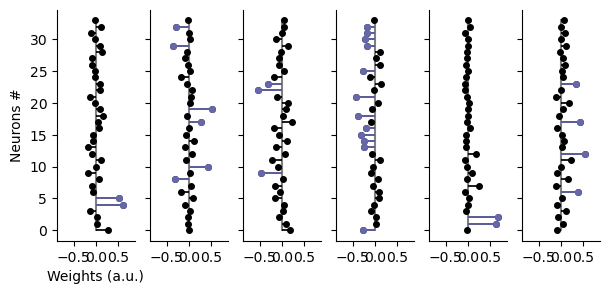

In [62]:
assembly_react_A010_day14.get_weights(epoch= assembly_react_A010_day14.epochs[3] & wake_epoch)
assembly_react_A010_day14.plot()
plt.show()

In [63]:
assembly_act_pre_A010_day14 = assembly_react_A010_day14.get_assembly_act(assembly_react_A010_day14.epochs[2] & nrem_epochs) 
assembly_act_post_A010_day14 = assembly_react_A010_day14.get_assembly_act(assembly_react_A010_day14.epochs[4] & nrem_epochs) 
act_pre_sleep_above_A010_day14 = np.where(assembly_act_pre_A010_day14.data[:] > 5, assembly_act_pre_A010_day14.data[:], 0)
act_post_sleep_above_A010_day14 = np.where(assembly_act_post_A010_day14.data[:] > 5, assembly_act_post_A010_day14.data[:], 0)

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.


In [64]:
reactivation_rates_A010_day14 = []

for pre_sleep_data, post_sleep_data in zip(act_pre_sleep_above_A010_day14, act_post_sleep_above_A010_day14):
    # Compute peak averages for the current pair of sessions
    pre_sleep_peak_averages = compute_peak_averages(pre_sleep_data)
    post_sleep_peak_averages = compute_peak_averages(post_sleep_data)
    
    # Average reactivation strengths
    avg_pre_sleep_reactivation = np.mean(pre_sleep_peak_averages)
    avg_post_sleep_reactivation = np.mean(post_sleep_peak_averages)
    
    # Overall average peak reactivation strength for normalization
    all_peak_averages = np.concatenate((pre_sleep_peak_averages, post_sleep_peak_averages))
    overall_average_reactivation = np.mean(all_peak_averages)
    
    # Calculate the reactivation strength difference and normalize
    reactivation_strength_difference = (avg_post_sleep_reactivation - avg_pre_sleep_reactivation)
    
    # Avoid division by zero if there are no peaks detected in both sessions
    if overall_average_reactivation != 0:
        normalized_reactivation_strength_difference = reactivation_strength_difference / overall_average_reactivation
    else:
        normalized_reactivation_strength_difference = 0
    
    reactivation_rates_A010_day14.append(normalized_reactivation_strength_difference)

# The reactivation_rates list now contains the reactivation rate for each pair of pre-sleep and post-sleep arrays
print("Reactivation Rates:", reactivation_rates_A010_day14)

Reactivation Rates: [0.5697254360870935, 0.16320916540384944, 0.10871378204503623, 0.008002237910012427, -0.37636397099722035, 0.38202609447449043]


In [65]:
num_ass = 6
Peak_reactivation_CA2_A010_day14 = [] 
Peak_reactivation_JointCA1_CA2_A010_day14 = []

for i in range(num_ass):
    reactivation_value = reactivation_rates_A010_day14[i]
    if i in {1,3}:
        Peak_reactivation_JointCA1_CA2_A010_day14.append(reactivation_value)
    else:
        Peak_reactivation_CA2_A010_day14.append(reactivation_value)

Peak_reactivation_CA2_A010_day14, Peak_reactivation_JointCA1_CA2_A010_day14

([0.5697254360870935,
  0.10871378204503623,
  -0.37636397099722035,
  0.38202609447449043],
 [0.16320916540384944, 0.008002237910012427])

## PeakReactivation Object

In [67]:
CA2_react = [*Peak_reactivation_CA2_A010_day14, *Peak_reactivation_CA2_A010_day26, *Peak_reactivation_CA2_A012_day15,
             *Peak_reactivation_CA2_A013_day13,*Peak_reactivation_CA2_A013_day15, *Peak_reactivation_CA2_A013_day7]
#CA3_react = [Peak_reactivation_CA3_A015_day12]
CA2_CA3_react = [*Peak_reactivation_JointCA2_3_A013_day7, *Peak_reactivation_Joint_A015_day12]
CA1_react = [*Peak_reactivation_CA1_A012_day15]
CA1_CA2_react = [*Peak_reactivation_JointCA1_CA2_A012_day15]

In [68]:
df = dict(CA2 = CA2_react,
      CA2_CA3 = CA2_CA3_react,
      #CA1 = CA1_react,
CA1_CA2 = CA1_CA2_react)
Peak_Reactivation_Strength = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in df.items() ]))

In [69]:
Peak_Reactivation_Strength

,CA2,CA2_CA3,CA1_CA2
0,0.569725,0.028499,-0.143103
1,0.108714,0.118310,0.056321
2,-0.376364,0.034425,-0.285571
3,0.382026,-0.006823,0.045538
4,0.043570,0.048153,0.013062
5,-0.030086,NaN,NaN
6,-0.032915,NaN,NaN
7,-0.355154,NaN,NaN
8,0.065687,NaN,NaN
9,1.253023,NaN,NaN


## Peak Reactivation Social and Object Interaction

In [153]:
df_social = {'CA2': [-0.8572012704404534,
  -0.6762113858132307,
  0.3598948031678654,
  0.033002482024668545,
  -0.10289201116867411,
  -0.060178114589213356,
  0.0473029383851538,
  0.06106566484486109,
  0.19885171566305923,
  1.8039345571021022,
  0.0560211536016921,
  -0.18975687088745094,
  -0.10351863317044314,
  0.05507283863800106,
  -0.006882449600860075,
  0.28784963427529714,
  -0.053465930921220706,
  0.057149133833485334,
  0.1811033722279208,
  0.25848439118891825,
  0.2630996726338623,
  -0.24926244172527892,
  0.2176521915758094],
 'CA2_CA3': [0.29890035295887857,
  -0.04557948866417958,
  0.37155990316280496,
  0.06947948396189098],
 'CA1_CA2': [0.01907799778351327,
  1.8641923542581582,
  0.7500394587591549,
  -1.7857142857142858,
  0.6152642678519273]}

In [155]:
Peak_Reactivation_Strength_Social = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in df_social.items() ]))
Peak_Reactivation_Strength_Social

,CA2,CA2_CA3,CA1_CA2
0,-0.857201,0.298900,0.019078
1,-0.676211,-0.045579,1.864192
2,0.359895,0.371560,0.750039
3,0.033002,0.069479,-1.785714
4,-0.102892,NaN,0.615264
5,-0.060178,NaN,NaN
6,0.047303,NaN,NaN
7,0.061066,NaN,NaN
8,0.198852,NaN,NaN
9,1.803935,NaN,NaN


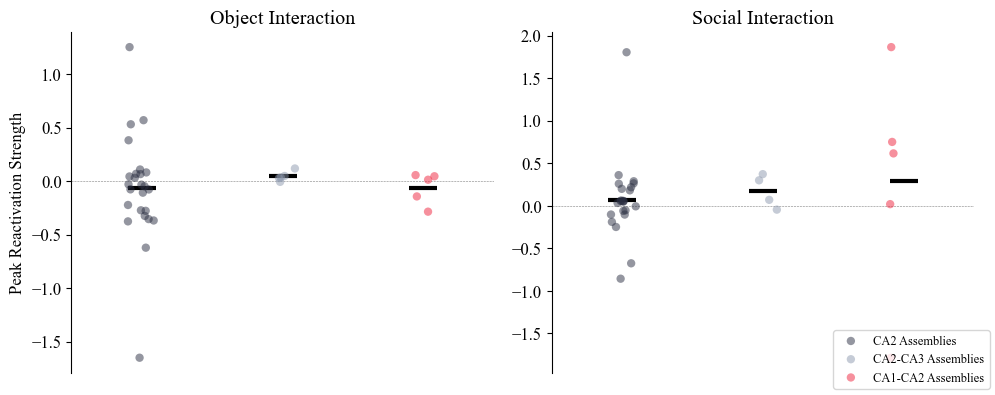

In [157]:
plt.style.use('seaborn-v0_8-pastel')
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12
# Set a consistent color palette
colors = ["#2B2F42", "#8D99AE", "#EF233C"]

# Object Interaction Plot
sns.stripplot(
    data=Peak_Reactivation_Strength,
    jitter=True, alpha=0.5, ax=axs[0], palette=colors, size = 6
)
sns.pointplot(
    data=Peak_Reactivation_Strength,
    linestyles="none", markers="_",  errorbar=None, markersize=20, markeredgewidth=3,ax=axs[0], color="black"
)
axs[0].set_title("Object Interaction")
axs[0].set_xlabel("")  # Remove x-axis label
axs[0].set_xticks([])  # Remove x-axis ticks
axs[0].set_ylabel("Peak Reactivation Strength")

# Social Interaction Plot
sns.stripplot(
    data=Peak_Reactivation_Strength_Social,
    jitter=True, alpha=0.5, ax=axs[1], palette=colors, size = 6
)
sns.pointplot(
    data=Peak_Reactivation_Strength_Social,
    linestyles="none", markers="_", ax=axs[1],  errorbar=None, markersize=20, markeredgewidth=3, color="black"
)
axs[1].set_title("Social Interaction")
axs[1].set_xlabel("")  # Remove x-axis label
axs[1].set_xticks([])  # Remove x-axis ticks


for ax in axs:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('none')
    
    ax.axhline(0, linestyle='--', color='grey', linewidth=0.4)

# Add legend with specific labels
fig.legend(['CA2 Assemblies', 'CA2-CA3 Assemblies', 'CA1-CA2 Assemblies'],
           loc='outside right lower', fontsize=9)
plt.tight_layout()
plt.show()


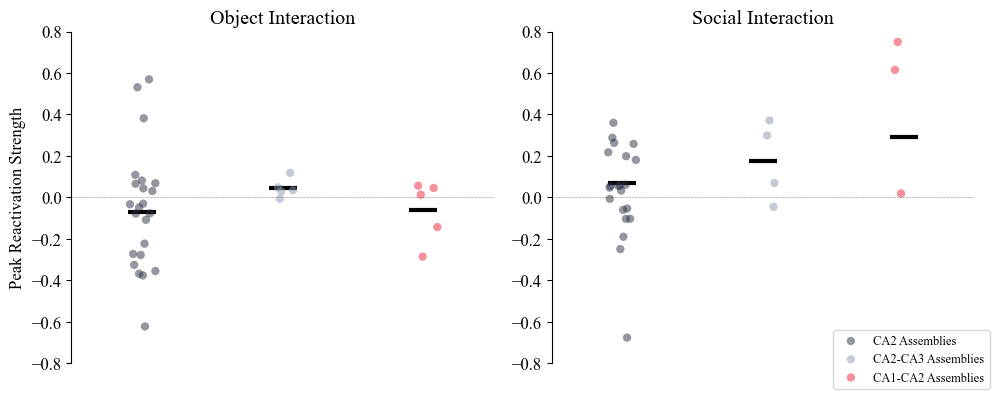

In [159]:
plt.style.use('seaborn-v0_8-pastel')
fig, axs = plt.subplots(1, 2, figsize=(10, 4))


colors = ["#2B2F42", "#8D99AE", "#EF233C"]

# Calculate the y-axis limits based on the combined range of both datasets
y_min = -0.8
y_max = 0.8

# Object Interaction Plot
sns.stripplot(
    data=Peak_Reactivation_Strength,
    jitter=True, alpha=0.5, ax=axs[0], palette=colors, size=6
)
sns.pointplot(
    data=Peak_Reactivation_Strength,
    linestyles="none", markers="_",  errorbar=None, markersize=20, markeredgewidth=3, ax=axs[0], color="black"
)
axs[0].set_title("Object Interaction")
axs[0].set_xlabel("")  # Remove x-axis label
axs[0].set_xticks([])  # Remove x-axis ticks
axs[0].set_ylabel("Peak Reactivation Strength")
axs[0].set_ylim(y_min, y_max)  # Set consistent y-axis limits

# Social Interaction Plot
sns.stripplot(
    data=Peak_Reactivation_Strength_Social,
    jitter=True, alpha=0.5, ax=axs[1], palette=colors, size=6
)
sns.pointplot(
    data=Peak_Reactivation_Strength_Social,
    linestyles="none", markers="_", ax=axs[1], errorbar=None, markersize=20, markeredgewidth=3, color="black"
)
axs[1].set_title("Social Interaction")
axs[1].set_xlabel("")  # Remove x-axis label
axs[1].set_xticks([])  # Remove x-axis ticks
axs[1].set_ylim(y_min, y_max)  # Set consistent y-axis limits

for ax in axs:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('none')
    ax.axhline(0, linestyle='--', color='grey', linewidth=0.4)

# Add legend with specific labels
fig.legend(['CA2 Assemblies', 'CA2-CA3 Assemblies', 'CA1-CA2 Assemblies'],
           loc='outside right lower', fontsize=9)

plt.tight_layout()
plt.show()


In [75]:
y_min

-0.8

In [76]:
y_max

0.8

In [77]:
z = np.abs(stats.zscore(Peak_Reactivation_Strength_Social))
z

,CA2,CA2_CA3,CA1,CA1_CA2
0,1.996312,NaN,NaN,NaN
1,1.606103,NaN,NaN,NaN
2,0.627713,NaN,NaN,NaN
3,0.077058,NaN,NaN,NaN
4,0.370043,NaN,NaN,NaN
5,0.277953,NaN,NaN,NaN
6,0.046227,NaN,NaN,NaN
7,0.016555,NaN,NaN,NaN
8,0.280508,NaN,NaN,NaN
9,3.741022,NaN,NaN,NaN
